## Multiple linear regression introduction
We can use linear algebra to predict the **$Y$** value using all multi-column at the same time. The way we do this is by creating a matrix of inputs, and we create a vector of the response that we want to predict. The matrix with the multiple column is denoted **$Y$** (capital x bold) while the vector for the response is denoted **$y$** (y bold)
* [Linear algebra from Khan academy](https://www.khanacademy.org/math/linear-algebra)
* [an introduction to statistical learning](http://www-bcf.usc.edu/~gareth/ISL/) - chapter 3

In this notebook (and following quizzes), you will be creating a few simple linear regression models, as well as a multiple linear regression model, to predict home value.

Let's get started by importing the necessary libraries and reading in the data you will be using.

In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
from patsy import dmatrices
import statsmodels.api as sm;
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [21]:
df['intercept'] = 1
mlm = sm.OLS(df['price'], df[['area', 'bedrooms', 'bathrooms', 'intercept']])
results = mlm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:08   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`1.` Using statsmodels, fit three individual simple linear regression models to predict price.  You should have a model that uses **area**, another using **bedrooms**, and a final one using **bathrooms**.  You will also want to use an intercept in each of your three models.

Use the results from each of your models to answer the first two quiz questions below.

In [22]:
df['intercept'] = 1
lm1 = sm.OLS(df['price'], df[['intercept', 'area']])
result1 = lm1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:09   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lm2 = sm.OLS(df['price'], df[['intercept', 'bedrooms']])
result2 = lm2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:10   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm3 = sm.OLS(df['price'], df[['intercept', 'bathrooms']])
result3 = lm3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:10   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.` Now that you have looked at the results from the simple linear regression models, let's try a multiple linear regression model using all three of these variables  at the same time.  You will still want an intercept in this model.

In [25]:
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
result = lm.fit()
result.summary() # multicolinearidade

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:10   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Along with using the **area**, **bedrooms**, and **bathrooms** you might also want to use **style** to predict the price.  Try adding this to your multiple linear regression model.  What happens?  Use the final quiz below to provide your answer.

* There is an error, because an object cannot be added to the multiple linear regression model

In [26]:
style_lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms', 'style']])
result_style = style_lm.fit()
result_style.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Create X and y matrix
X = df[['intercept', 'area', 'bedrooms', 'bathrooms']]
y = df['price']

Regression closed form solution:

$\hat{\beta}=(X`X)^-X`y$

$X`$ means X transpose

$()⁻$ means the inverstion of the results inside the parentheses

In Numpy get the transpose, the inverses and the dot products to get the coeficients results for each column

* [OLS in matrix form](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf)

In [27]:
beta = np.linalg.inv(np.dot(X.transpose(),X)) #(X'X)^-
beta = np.dot(beta, X.transpose()) #(X'X)^- * X'
beta = np.dot(beta, y) # (X'X)^-X' * y
beta

NameError: name 'X' is not defined

## Dummy variables
Instead of adding columns with categorical variables, create columns with the presence or not of a variable (been the column name the varible present or not) enconded by 1 (exist) and 0 (not exist). Because the last column can be inferred from the earlier two columns, as the one values are only in the rows that didn't have ones in one of these other columns, we actually end up choosing to drop this column (which one doesn't really matter too much, noted as reference column). Without the last column, the matrix is [full rank](https://www.cds.caltech.edu/~murray/amwiki/index.php/FAQ:_What_does_it_mean_for_a_non-square_matrix_to_be_full_rank%3F)
![image-example](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a297de8_screen-shot-2017-12-07-at-9.43.05-am/screen-shot-2017-12-07-at-9.43.05-am.png)

* The number of variables dummy added to the matrix X and the level of each categorical variable minus one have to be equal;
* The motivation to delete one dummy variable is to garanteee that all the column are linear independent, product of $X`X$ is invertible and the matrix X be full rank.


In [28]:
df[['A', 'B', 'C']] = pd.get_dummies(df['neighborhood']) 
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'])
# You always drop one level from each category. This is called the baseline (the dropped column)
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'lodge', 'ranch']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:11   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.000    1.03e+06    1.06e+06
lodge      -7.411e+05   1.44e+04    -51.396      0.000   -7.69e+05   -7.13e+05
ranch       -4.71e+05   1.27e+04    -37.115      0.000   -4.96e+05   -4.46e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The intercept means that if our home is a **victorian** home, we predict its price to be 1,046,000 dollars and **lodge** is predicted to be 741,000 less than a **victorian**. A **ranch** is predicted to be 471,000 less than a **victorian**.


`1.` Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining dummy variables for the **neighborhood** column.  Then use [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) to add the dummy variables to your dataframe, **df**, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** to predict the price. Don't forget an intercept.

Use your results to answer quiz 1 below.

In [29]:
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
df_new.head()

ValueError: columns overlap but no suffix specified: Index([u'A', u'B', u'C'], dtype='object')

In [ ]:
df_new['intercept'] = 1
lm = sm.OLS(df_new['price'], df_new[['intercept', 'A', 'B', 'C']])
results = lm.fit()
results.summary()

`2.`  Now, fit an appropriate linear model for using **neighborhood** to predict the price of a home. Use **neighborhood A** as your baseline.  Use your resulting model to answer the questions in Quiz 2 and Quiz 3 below.

In [30]:
lm = sm.OLS(df_new['price'], df_new[['intercept', 'C', 'B']])
results = lm.fit()
results.summary()

NameError: name 'df_new' is not defined

* Observe que cada um dos coeficientes é uma comparação da categoria com a referência. Portanto, um coeficiente positivo sugere que o bairro é mais caro, em média, do que a referência. Por outro lado, um coeficiente negativo sugere que o bairro é menos caro, em média, do que a referência.

* Você pode olhar para os valores-p para comparar com o bairro A. Para comparar o bairro B ao bairro C, você pode comparar os intervalos de confiança. Como os intervalos de confiança para B e C não se sobrepõem, temos provas de que eles diferem também.

`3.` Run the two cells below to look at the home prices for the A and C neighborhoods. Add neighborhood B. This creates a glimpse into the differences that you found in the previous linear model.

In [31]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');
plt.hist(df_new.query("B == 1")['price'], alpha = 0.3, label = 'B')

plt.legend();

NameError: name 'df_new' is not defined

`4.` Now, add dummy variables for the **style** of house. Create a new linear model using these new dummies, as well as the previous **neighborhood** dummies.  Use **ranch** as the baseline for the **style**.  Additionally, add **bathrooms** and **bedrooms** to your linear model.  Don't forget an intercept.  Use the results of your linear model to answer the last two questions below. **Home prices are measured in dollars, and this dataset is not real.**

To minimize scrolling, it might be useful to open another browser window to this concept to answer the quiz questions.

In [32]:
sty = pd.get_dummies(df_new['style'])
new_new_df = df_new.join(sty)
lm = sm.OLS(new_new_df['price'], new_new_df[['intercept', 'B', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

NameError: name 'df_new' is not defined

* 80.9%  (r-squared) da variabilidade no preço pode ser explicada pelo modelo linear construído usando o estilo de quartos, banheiros, vizinhança e da casa;
* Para cada quarto adicional em uma casa, espera-se um aumento de preço de 173200, em que todas as outras variáveis são mantidas constantes;
* Para cada banheiro adicional em uma casa, espera-se um aumento de preço de 99960, em que todas as outras variáveis são mantidas constantes;
* Espera-se que uma casa vitoriana custará 70560 a mais do que uma fazenda, sendo todo o resto igual;
* Espera-se que uma casa na vizinhança C custará 7168 menos que uma casa na vizinhança A, sendo todo o resto igual.

---

## Dummy variables recap

The biggest reason for use encoding one, zero and negative one is that it changes the coefficients that we get back from the model as well as how interpret those coefficients.
With one-zero encoding your interpreter coefficients as a comparion to a baseline category. However, if use one-zer-negative one encoding

In [33]:
df = pd.read_csv('./house_prices.csv')
df2 = df.copy()
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [34]:
## The below function creates 1, 0, -1 coded dummy variables.

def dummy_cat(df, col):
    '''
    INPUT:
    df - the dataframe where col is stored
    col - the categorical column you want to dummy (as a string)
    OUTPUT:
    df - the dataframe with the added columns
         for dummy variables using 1, 0, -1 coding
    '''
    for idx, val_0 in enumerate(df[col].unique()):
        if idx + 1 < df[col].nunique():            
            df[val_0] = df[col].apply(lambda x: 1 if x == val_0 else 0)
        else:    
            df[val_0] = df[col].apply(lambda x: -1 if x == val_0 else 0)
            for idx, val_1 in enumerate(df[col].unique()):
                if idx + 1 < df[col].nunique():
                    df[val_1] = df[val_0] + df[val_1]
                else:
                    del df[val_1]
    return df

In [35]:
new_df = dummy_cat(df, 'style') # Use on style
new_df.head(10)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0
1,491,B,3512,5,3,victorian,1744259,0,1
2,5952,B,1134,3,2,ranch,571669,1,0
3,3525,A,1940,4,2,ranch,493675,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1
5,7507,C,1785,4,2,lodge,455235,-1,-1
6,4964,B,2996,5,3,victorian,1489871,0,1
7,7627,C,3263,5,3,victorian,821931,0,1
8,6571,A,1159,3,2,ranch,299903,1,0
9,5220,A,1248,3,2,victorian,321975,0,1


In [36]:
new_df['intercept'] = 1

lm = sm.OLS(new_df['price'], new_df[['intercept', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:15   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.421e+05   5854.251    109.677      0.000    6.31e+05    6.54e+05
ranch      -6.695e+04   8233.489     -8.131      0.000   -8.31e+04   -5.08e+04
victorian    4.04e+05   7377.372     54.763      0.000     3.9e+05    4.18e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         1.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
style_dummies = pd.get_dummies(df['style'])
new_df2 = df2.join(style_dummies)
new_df2.head(10)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,0,1
5,7507,C,1785,4,2,lodge,455235,1,0,0
6,4964,B,2996,5,3,victorian,1489871,0,0,1
7,7627,C,3263,5,3,victorian,821931,0,0,1
8,6571,A,1159,3,2,ranch,299903,0,1,0
9,5220,A,1248,3,2,victorian,321975,0,0,1


In [38]:
new_df2['intercept'] = 1

lm2 = sm.OLS(new_df2['price'], new_df2[['intercept', 'ranch', 'victorian']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:16   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.05e+05   1.21e+04     25.120      0.000    2.81e+05    3.29e+05
ranch       2.701e+05   1.57e+04     17.153      0.000    2.39e+05    3.01e+05
victorian   7.411e+05   1.44e+04     51.396      0.000    7.13e+05    7.69e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alguns pontos a serem observados: Em primeiro lugar, a programação 1, 0 significa uma comparação com a categoria de base. Depois, a programação 1, 0,-1 significa uma comparação com a média geral. Por fim, a linguagem de aumento de uma unidade está associada às variáveis quantitativas, e não às variáveis categóricas.

* 33.9% da variabilidade no preço pode ser explicada pelo estilo de casa.
* 642100 é o preço médio de moradia previsto, sem levar em conta o estilo.
* Em comparação a uma hospedaria, prevemos que uma casa vitoriana tenha uma alta de preço de 741100, mantendo todo o resto constante.
* Em comparação a uma casa mediana, prevemos que o preço de uma casa vitoriana seja 404000 maior, mantendo todas as outras variáveis constantes.

Para prever a categoria de referência na codificação 1, 0, você tem que utilizar o intercepto. Na codificação 1, 0, -1, você precisa multiplicar cada coeficiente categórico por -1 para chegar na categoria que falta. Com isto em mente, qual é o preço médio previsto para hospedarias utilizando o modelo de codificação 1, 0, -1?

* Multiplicando -1 pela fazenda e pela casa vitoriana, obtemos o seguinte resultado: 642100 + 66950 - 404000 = 305050. Observe também que isso coincide com a mesma previsão (erro de 50 devido aos arredondamentos), que você vê no modelo de codificação 0,1

---

## Potential problems introduction

There's a number of problems that may arise. First, what is your model for?
* To understand if your X and Y variables are related?
* To best predict the response variable?
* Find which variables are really useful in predicting your response?

Depending on which aspects you're most interesed in, this can help determine which problems you actually care about addressing.

* A linear relationship may not exist between your response and predictor variables;
* You might have correlated errors;
* You might not have constant variance of your errors;
* You might have outliers or leverage points that hurt your model;
* You might have multicolliearity.

Chapter 3 of "[An introduction to statistical learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)" dives into each of the above.

1. Não-linearidade das relações entre preditor e resposta
2. Correlação dos termos de erro
3. Variância não-constante e erros normalmente distribuídos
4. Outliers/pontos de alta alavancagem
5. Colinearidade

### Linearidade
A suposição de linearidade é que o modelo linear representa a verdadeira relação existente entre a variável de resposta e a preditora. Se isso não for verdade, então as suas previsões não serão muito precisas. Além disso, as relações lineares associadas aos seus coeficientes também não são muito úteis.

Para avaliar se uma relação linear é razoável, um gráfico dos resíduos $(y-\hat{y})$ pelos valores preditos (\hat{y}) geralmente é útil. Se existem padrões de curvatura neste gráfico, isso sugere que um modelo linear pode não se ajustar adequadamente aos dados, e alguma outra relação existe entre as variáveis preditoras e de resposta. Existem muitas maneiras de criar modelos não-lineares (até mesmo usando o formato do modelo linear), e você será apresentado a algumas delas.

Na imagem na parte inferior desta página, os modelos são considerados viesados. O ideal seria que tivéssemos uma dispersão aleatória de pontos como na figura do gráfico de resíduos do canto superior esquerdo.

#### Erros correlacionados
Os erros correlacionados frequentemente ocorrem quando nossos dados são coletados ao longo do tempo (como na projeção de preços de ações ou taxas de juros futuras) ou quando os dados são relacionados espacialmente (como a previsão de regiões de inundações ou secas). Muitas vezes podemos melhorar nossas previsões usando informações dos últimos pontos de dados (para o tempo) ou os pontos nas proximidades (para o espaço).

O principal problema em não levar em conta os erros correlacionados é que você poderia utilizar essa correlação para sua vantagem, prevendo de uma maneira melhor os eventos futuros ou eventos espacialmente próximos uns dos outros.

Um dos jeitos mais comuns de identificar se os erros são correlacionados é verificar o domínio de onde os dados são coletados. Se você não tiver certeza, há um teste conhecido como teste [Durbin-Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) que é comumente usado para avaliar se a correlação dos erros é um problema. Depois disso, os modelos [ARIMA ou ARMA](http://www.statsref.com/HTML/index.html?arima.html) são comumente implementados para usar esta correlação em previsões melhores.

#### Variância não-constante e erros normalmente distribuídos
Variância não-constante ocorre quando a propagação dos valores previstos difere dependendo de qual é o valor que se está tentando prever. Isto não é um problema enorme em termos de uma boa previsão. No entanto, isso leva a intervalos de confiança e p-valores que são imprecisos. Os intervalos de confiança para os coeficientes serão amplos demais para áreas onde os valores reais estão mais perto dos valores previstos, mas serão muito estreitos para áreas onde os valores reais estão mais separados dos valores previstos.

Comumente, um logaritmo (ou alguma outra transformação da variável de resposta) é feita para “se livrar” da variância não-constante. A fim de escolher a transformação, um [Box-Cox](http://www.statisticshowto.com/box-cox-transformation/) é geralmente usado.

A variância não constante pode ser avaliada novamente, usando um gráfico dos resíduos pelos valores previstos. Na imagem na parte inferior da página, a variância não-constante é rotulada como **heteroscedástica**. Idealmente, queremos um modelo não viesado e com resíduos homocedásticos (consistente em toda o intervalo de valores).

Embora o texto não aborde a normalidade dos resíduos, esta é uma suposição importante da regressão se você está interessado em criar intervalos de confiança adequados. Mais sobre este tema é fornecido [aqui](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm).

#### Outliers/pontos de alavancagem
Outliers e pontos de alavancagem são pontos que se encontram longe das tendências regulares de seus dados. Estes pontos podem ter uma grande influência na sua solução. Na prática, estes pontos podem até ser erros de digitação. Se você estiver agregando dados de várias fontes, é possível que alguns dos valores dos dados sejam transferidos ou agregados incorretamente.

Em outros momentos os outliers são pontos de dados precisos e verdadeiros, não necessariamente um erro de medição ou de entrada de dados. Nesses casos, o ‘ajuste’ é mais subjetivo. Muitas vezes a estratégia para trabalhar com estes pontos depende do objetivo de sua análise. Modelos lineares usando o método de mínimos quadrados ordinários, em particular, não são muito robustos. Ou seja, outliers grandes podem alterar fortemente nossos resultados. Existem técnicas para combater isso - amplamente conhecidas como técnicas de **regularização**. Elas estão além do escopo desta aula, mas são discutidas rapidamente na versão gratuita do [Nanodegree de Machine Learning](https://classroom.udacity.com/courses/ud120).

Um curso inteiro sobre regressão é fornecido pela Penn State University e eles tomam um tempo particularmente grande para discutir o tema dos pontos de alavancagem [aqui](https://newonlinecourses.science.psu.edu/stat501/node/336/).

#### Colinearidade (multicolinearidade)
ulticolinearidade ocorre quando temos variáveis preditoras que estão correlacionadas entre si. Uma das principais preocupações da multicolinearidade é que ela pode levar a coeficientes a serem invertidos da direção que esperamos na regressão linear simples.

Uma das maneiras mais comuns para identificar multicolinearidade é com gráficos bivariados ou com **fatores de inflação de variância (ou VIFs)**.

![ibagem](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/June/5b3254fc_estatistica-regressao-linear-multipla-pt/estatistica-regressao-linear-multipla-pt.png)

---

## Multicollinearity and VIFs

One of the main assumptions of multiple linear regression models, is that our predictor variables are uncorrelated with one another (our x-var should be correlated with the response, but not each other).

In [39]:
df = pd.read_csv('./house_prices.csv')
df2 = df.copy()
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


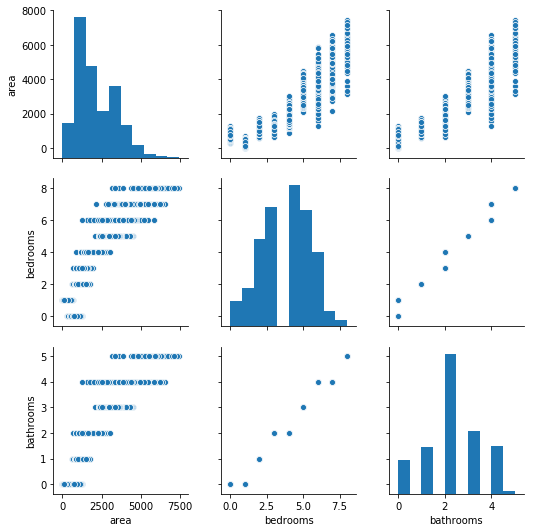

In [40]:
sb.pairplot(df[['area', 'bedrooms', 'bathrooms']]);
# each of them has pretty strong positive relationship

In [41]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:09:39   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The bedrooms has a negative coefficient associated with it.
* Even though price and bedrooms have a positive relationship between one another, in the multiple linear regression model it showed up negative
* The interpretation of this coefficient is now counter-intuitive to the relationship expected and what is actually true in the bivariate case.
* This is one potential side effect of having multicollinearity in the model, is these flipped coefficients from what you expect to be true.
* Another way to identify our predictors is correlated with one another, is **variance inflation factors** (VIFs)
* It can be calculated for each x variables:

In [48]:
y,  X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


* Remove at least one of these last two variables as both of their variants inflation factors are larger than 10.

Vimos que quando variáveis ‘x’ estão relacionadas entre si, podemos inverter as relações em nossos modelos de regressão linear múltipla frente ao que esperaríamos quando olhamos para as relações bivariadas da regressão linear.

Para saber mais sobre VIFs e multicolinearidade, aqui está a publicação referenciada do vídeo sobre [VIFs](https://etav.github.io/python/vif_factor_python.html).

* The case that X variables were correlated with one another can lead to flipped regression coefficients from the expected relationships and inaccurate hypothesis testing results.
* When X variables are related to one another these results can be very misleading.
* We saw two ways to identify multicollinearity: scatterplot matrix or variance inflation factors (VIFs).
* If you have larger than ten for a VIF then you have multicollinearity in your model. 
* VIF for a particular variable is computed as one over one minus R squared, where the R squared is computed as the R squared for that X variable being predicted by all the other X variables.

$VIF_i=\frac{1}{1-R_i^2}$

$x_i=b_0+b_1x_1+b_2x_2+...+b_n+x_n$

>R2 = <1-R2

It's unusual to find only one large VIF in a model, because if two or more X variables are related to one anoter you would expect each of these variables to have a high VIF.
The most common way to work with variables that are corre


